## Linear Regression and RANSAC
This notebook creates a random dataset and performs a linear regressions and RANSAC regression

In [183]:
# Load the modules we need.
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [184]:
#  Create some intial data
n_samples = 1000

X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

In [185]:
# Add some outlier data
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [186]:
# Create some test positions for for the lines we will draw
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [187]:
def linReg(X,y):
    a = np.sum(X.T*y)
    b = np.sum(X.T*X.T)
    g = np.sum(X.T)
    d = np.sum(y)
    n = np.size(X.T)

    r = np.dot(np.linalg.inv(np.reshape([b,g,g,n],(2,2))),[a,d])
    return (r[0],r[1])

m,c = linReg(X,y)
line_y = m*line_X + c
print(line_y)

[[-174.38323639]
 [-120.21087252]
 [ -66.03850865]
 [ -11.86614478]
 [  42.30621909]
 [  96.47858295]
 [ 150.65094682]
 [ 204.82331069]]


In [188]:
import math
S = 2

N = math.ceil(np.log(0.01) / np.log(1 - ( 1 - (n_outliers/np.size(X)))**S))

thr_err = 50  

best_err = float("inf")
best_max = 0

line_y_ransac = 0

k = 0 

inlier_mask = np.full(np.size(X),True,dtype=bool)

Smpl = []

while k<N:
    curr_err = 0
    curr_max = 0
    newS = [random.randint(0,np.size(X)) for _ in range(S)]
    for s in newS:
        Smpl.append(s)

    X_new = np.array([X[x] for x in Smpl])
    y_new = [y[x] for x in Smpl]

    m,c = linReg(X_new,y_new)
    
    for i in range(np.size(X)):
        pred_y = X[i]*m + c
        err = abs(pred_y - y[i])
        curr_err+=err
        if not err <= thr_err:
            inlier_mask[i] = False
        else:
            inlier_mask[i] = True
            curr_max += 1
            
    if curr_max > best_max:
        best_max = curr_max
        best_err = curr_err
        line_y_ransac = m*line_X + c
    elif curr_max == best_max:
        if curr_err < best_err:
            best_max = curr_max
            best_err = curr_err
            line_y_ransac = m*line_X + c
    else:
        Smpl = Smpl[:len(Smpl)-S]
        
    k+=1
    
print(m,c)
print("inliers : ",curr_max)
print()
print(line_y_ransac)
outlier_mask = np.logical_not(inlier_mask)

84.81959417819638 -10.087494955649554
inliers :  950

[[-269.18498061]
 [-182.91251007]
 [ -96.64003953]
 [ -10.36756899]
 [  75.90490155]
 [ 162.17737209]
 [ 248.44984263]
 [ 334.72231317]]


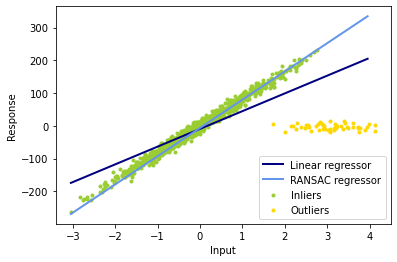

In [189]:
lw = 2

doing_linear = True
doing_ransac = True

if (doing_linear):
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')

if (doing_ransac):
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
else:
    plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
    
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()